# Research Proposal: Deep RL Agents in the Sugarscape Trading Model

## Introduction

This study introduces a trading-aware extension of the classical \textit{Sugarscape} model, integrating deep reinforcement learning (DRL) to jointly optimize agents’ movement and trading decisions. Using the Proximal Policy Optimization (PPO) algorithm, agents learn adaptive policies that balance foraging, trading, and survival, effectively closing the long-standing “move–then–trade” gap in agent-based economics.

Empirical results demonstrate that DRL agents outperform traditional rule-based agents across multiple dimensions: survival rates, price stability, welfare, and sustainability. Learning agents achieve higher carrying capacity and exhibit emergent trade networks that raise overall efficiency while maintaining lower volatility in equilibrium prices. The resulting wealth distributions retain the empirically observed heavy-tailed form yet display milder inequality than in rule-based economies.

The findings show that incorporating adaptive, trading-aware decision processes leads to more stable and efficient artificial economies. Beyond theoretical contribution, the DRL-enhanced **Sugarscape** serves as a policy-testing and simulation platform for sustainable resource management, computational economics, and economic game design.



## Research Questions

Building on the theoretical framework of reinforcement learning in the Sugarscape environment, this study is guided by the following hypotheses and research questions:

- **H1 (Carrying Capacity Advantage).**
  DRL agents that jointly optimize movement and trading will achieve a higher carrying capacity (survival rate) than rule-based agents under identical environmental conditions.
  **Rationale:** The integrated policy enables DRL agents to anticipate future barter opportunities and allocate resources more efficiently, reducing starvation and raising the sustainable population level.

- **H2 (Market Equilibrium and Price Stability).**
  DRL-driven societies will exhibit faster convergence of market prices and lower volatility compared with heuristic rule-based societies.
  **Rationale:** Adaptive trading strategies allow DRL agents to arbitrage local price discrepancies more rapidly, pushing the decentralized market closer to Pareto-efficient equilibrium.

- **H3 (Resource Efficiency and Welfare).**
  DRL agents will utilize environmental resources more efficiently—harvesting a greater fraction of regrown sugar and spice—and generate higher aggregate welfare (total wealth) than rule-based agents.
  **Rationale:** Learning-based policies internalize both consumption needs and opportunity costs, enabling near-optimal allocation of resources through proactive foraging and trade.

- **H4 (Inequality Dynamics).**
  Although DRL agents initially produce higher short-run inequality, the long-run wealth distribution will stabilize with lower Gini and Pareto-tail inequality than in heuristic populations.
  **Rationale:** Extensive trading redistributes resources from surplus to deficit agents, mitigating inequality that would otherwise persist under static rules.

### Research Questions

1. How does embedding trading intent into movement decisions affect the emergent macroeconomic equilibrium?
2. Does learning-based adaptivity improve social welfare and sustainability without central coordination?
3. What role do alternative reward structures (Cobb–Douglas vs. kinked survival utility) play in shaping market outcomes and inequality?


### Import Libraries

Import all the essential Python libraries required for data analysis and visualization.

In [1]:
from simulation_manager import *

## 1. Generate data

### 1.1. Configurations Table

| configuration | map_size | randomization | timeline | number_of_simulation | metabolism_rate | model         | fertility |
|--------------:|:--------:|:-------------:|---------:|---------------------:|----------------:|:--------------|:----------|
|             1 | 100x100  |     FALSE     |      150 |                   50 |           [1,5] | hard_code     | FALSE     |
|             2 | 100x100  |     FALSE     |      150 |                   50 |           [1,5] | cobb_douglas  | FALSE     |
|             3 | 100x100  |     TRUE      |      150 |                   50 |           [1,5] | hard_code     | FALSE     |
|             4 | 100x100  |     TRUE      |      150 |                   50 |           [1,5] | cobb_douglas  | FALSE     |
|             5 | 100x100  |     FALSE     |      500 |                   50 |           [1,5] | cobb_douglas  | TRUE      |
|             6 | 100x100  |     FALSE     |      500 |                   50 |           [1,5] | cobb_douglas  | TRUE      |


#### 1.1.1. Simulation with configuration 1

In [2]:
# metrics_config1 = run_simulation()

Waiting for Unity...
Connected by ('127.0.0.1', 52336)
Stop record!


In [3]:
# list_trade_counts_config1 = [[m.TradeCount for m in episode] for episode in metrics_config1]
# list_market_prices_config1 = [[m.MarketPrice for m in episode] for episode in metrics_config1]
# list_alive_agents_config1 = [[m.AliveAgent for m in episode] for episode in metrics_config1]
# list_inequality_config1 = [[m.Inequality for m in episode] for episode in metrics_config1]
# list_average_welfare_config1 = [[m.AverageWelfare for m in episode] for episode in metrics_config1]
# list_cr_ratios_config1 = [[m.CRRatio for m in episode] for episode in metrics_config1]
# list_step_agents_config1 = [[m.Agents for m in episode] for episode in metrics_config1]

In [13]:
# list_of_trades_config1 = []
# for i in range(len(list_trade_counts_config1)):
#     delta_trade_count = []
#     for j in range(1,len(list_trade_counts_config1[i])):
#         delta_trade_count.append(list_trade_counts_config1[i][j] - list_trade_counts_config1[i][j-1])
#     list_of_trades_config1.append(delta_trade_count)

Save generated data.

In [28]:
# version = ''
# with open(f'submission_data/list_trade_counts_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_config1, f)
# with open(f'submission_data/list_market_prices_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_config1, f)
# with open(f'submission_data/list_alive_agents_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_config1, f)
# with open(f'submission_data/list_inequality_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_config1, f)
# with open(f'submission_data/list_average_welfare_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_config1, f)
# with open(f'submission_data/list_cr_ratios_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_config1, f)
# with open(f'submission_data/list_step_agents_config1{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_config1, f)

Load data if existing

In [2]:
version = ''
with open(f'submission_data/list_trade_counts_config1{version}.pkl', 'rb') as f:
    list_trade_counts_config1 = pickle.load(f)
with open(f'submission_data/list_market_prices_config1{version}.pkl', 'rb') as f:
    list_market_prices_config1 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config1{version}.pkl', 'rb') as f:
    list_alive_agents_config1 = pickle.load(f)
with open(f'submission_data/list_inequality_config1{version}.pkl', 'rb') as f:
    list_inequality_config1 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config1{version}.pkl', 'rb') as f:
    list_average_welfare_config1 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config1{version}.pkl', 'rb') as f:
    list_cr_ratios_config1 = pickle.load(f)
with open(f'submission_data/list_step_agents_config1{version}.pkl', 'rb') as f:
    list_step_agents_config1 = pickle.load(f)

#### 1.1.2. Simulation with configuration 2

In [5]:
# metrics_config2 = run_simulation()

Waiting for Unity...
Connected by ('127.0.0.1', 52390)
Stop record!


In [6]:
# list_trade_counts_config2 = [[m.TradeCount for m in episode] for episode in metrics_config2]
# list_market_prices_config2 = [[m.MarketPrice for m in episode] for episode in metrics_config2]
# list_alive_agents_config2 = [[m.AliveAgent for m in episode] for episode in metrics_config2]
# list_inequality_config2 = [[m.Inequality for m in episode] for episode in metrics_config2]
# list_average_welfare_config2 = [[m.AverageWelfare for m in episode] for episode in metrics_config2]
# list_cr_ratios_config2 = [[m.CRRatio for m in episode] for episode in metrics_config2]
# list_step_agents_config2 = [[m.Agents for m in episode] for episode in metrics_config2]

Save generated data.

In [6]:
# version = ''
# with open(f'submission_data/list_trade_counts_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_config2, f)
# with open(f'submission_data/list_market_prices_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_config2, f)
# with open(f'submission_data/list_alive_agents_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_config2, f)
# with open(f'submission_data/list_inequality_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_config2, f)
# with open(f'submission_data/list_average_welfare_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_config2, f)
# with open(f'submission_data/list_cr_ratios_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_config2, f)
# with open(f'submission_data/list_step_agents_config2{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_config2, f)

Load data if existing

In [3]:
version = ''
with open(f'submission_data/list_trade_counts_config2{version}.pkl', 'rb') as f:
    list_trade_counts_config2 = pickle.load(f)
with open(f'submission_data/list_market_prices_config2{version}.pkl', 'rb') as f:
    list_market_prices_config2 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config2{version}.pkl', 'rb') as f:
    list_alive_agents_config2 = pickle.load(f)
with open(f'submission_data/list_inequality_config2{version}.pkl', 'rb') as f:
    list_inequality_config2 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config2{version}.pkl', 'rb') as f:
    list_average_welfare_config2 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config2{version}.pkl', 'rb') as f:
    list_cr_ratios_config2 = pickle.load(f)
with open(f'submission_data/list_step_agents_config2{version}.pkl', 'rb') as f:
    list_step_agents_config2 = pickle.load(f)

#### 1.1.3. Simulation with configuration 3

In [8]:
# metrics_config3 = run_simulation()

Waiting for Unity...
Connected by ('127.0.0.1', 52406)
Stop record!


In [9]:
# list_trade_counts_config3 = [[m.TradeCount for m in episode] for episode in metrics_config3]
# list_market_prices_config3 = [[m.MarketPrice for m in episode] for episode in metrics_config3]
# list_alive_agents_config3 = [[m.AliveAgent for m in episode] for episode in metrics_config3]
# list_inequality_config3 = [[m.Inequality for m in episode] for episode in metrics_config3]
# list_average_welfare_config3 = [[m.AverageWelfare for m in episode] for episode in metrics_config3]
# list_cr_ratios_config3 = [[m.CRRatio for m in episode] for episode in metrics_config3]
# list_step_agents_config3 = [[m.Agents for m in episode] for episode in metrics_config3]

In [8]:
# list_of_trades_config3 = []
# for i in range(len(list_trade_counts_config3)):
#     delta_trade_count = []
#     for j in range(1,len(list_trade_counts_config3[i])):
#         delta_trade_count.append(list_trade_counts_config3[i][j] - list_trade_counts_config3[i][j-1])
#     list_of_trades_config3.append(delta_trade_count)

Save generated data

In [8]:
# version = ''
# with open(f'submission_data/list_trade_counts_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_config3, f)
# with open(f'submission_data/list_market_prices_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_config3, f)
# with open(f'submission_data/list_alive_agents_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_config3, f)
# with open(f'submission_data/list_inequality_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_config3, f)
# with open(f'submission_data/list_average_welfare_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_config3, f)
# with open(f'submission_data/list_cr_ratios_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_config3, f)
# with open(f'submission_data/list_step_agents_config3{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_config3, f)

Load data if existing

In [4]:
version = ''
with open(f'submission_data/list_trade_counts_config3{version}.pkl', 'rb') as f:
    list_trade_counts_config3 = pickle.load(f)
with open(f'submission_data/list_market_prices_config3{version}.pkl', 'rb') as f:
    list_market_prices_config3 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config3{version}.pkl', 'rb') as f:
    list_alive_agents_config3 = pickle.load(f)
with open(f'submission_data/list_inequality_config3{version}.pkl', 'rb') as f:
    list_inequality_config3 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config3{version}.pkl', 'rb') as f:
    list_average_welfare_config3 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config3{version}.pkl', 'rb') as f:
    list_cr_ratios_config3 = pickle.load(f)
with open(f'submission_data/list_step_agents_config3{version}.pkl', 'rb') as f:
    list_step_agents_config3 = pickle.load(f)

#### 1.1.4. Simulation with configuration 4

In [11]:
# metrics_config4 = run_simulation()

Waiting for Unity...
Connected by ('127.0.0.1', 52420)
Stop record!


In [12]:
# list_trade_counts_config4 = [[m.TradeCount for m in episode] for episode in metrics_config4]
# list_market_prices_config4 = [[m.MarketPrice for m in episode] for episode in metrics_config4]
# list_alive_agents_config4 = [[m.AliveAgent for m in episode] for episode in metrics_config4]
# list_inequality_config4 = [[m.Inequality for m in episode] for episode in metrics_config4]
# list_average_welfare_config4 = [[m.AverageWelfare for m in episode] for episode in metrics_config4]
# list_cr_ratios_config4 = [[m.CRRatio for m in episode] for episode in metrics_config4]
# list_step_agents_config4 = [[m.Agents for m in episode] for episode in metrics_config4]

Save generated data

In [10]:
# version = ''
# with open(f'submission_data/list_trade_counts_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_config4, f)
# with open(f'submission_data/list_market_prices_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_config4, f)
# with open(f'submission_data/list_alive_agents_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_config4, f)
# with open(f'submission_data/list_inequality_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_config4, f)
# with open(f'submission_data/list_average_welfare_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_config4, f)
# with open(f'submission_data/list_cr_ratios_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_config4, f)
# with open(f'submission_data/list_step_agents_config4{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_config4, f)

Load data if existing

In [5]:
version = ''
with open(f'submission_data/list_trade_counts_config4{version}.pkl', 'rb') as f:
    list_trade_counts_config4 = pickle.load(f)
with open(f'submission_data/list_market_prices_config4{version}.pkl', 'rb') as f:
    list_market_prices_config4 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config4{version}.pkl', 'rb') as f:
    list_alive_agents_config4 = pickle.load(f)
with open(f'submission_data/list_inequality_config4{version}.pkl', 'rb') as f:
    list_inequality_config4 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config4{version}.pkl', 'rb') as f:
    list_average_welfare_config4 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config4{version}.pkl', 'rb') as f:
    list_cr_ratios_config4 = pickle.load(f)
with open(f'submission_data/list_step_agents_config4{version}.pkl', 'rb') as f:
    list_step_agents_config4 = pickle.load(f)

#### 1.1.5. Simulation with configuration 5

In [ ]:
# metrics_test_stdev_convergence_rule_based = run_simulation() # for rule-based with metabolism of 1 for rule-based

In [ ]:
# list_trade_counts_test_stdev_1 = [[m.TradeCount for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_market_prices_test_stdev_1 = [[m.MarketPrice for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_alive_agents_test_stdev_1 = [[m.AliveAgent for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_inequality_test_stdev_1 = [[m.Inequality for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_average_welfare_test_stdev_1 = [[m.AverageWelfare for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_cr_ratios_test_stdev_1 = [[m.CRRatio for m in episode] for episode in metrics_test_stdev_convergence_rule_based]
# list_step_agents_test_stdev_1 = [[m.Agents for m in episode] for episode in metrics_test_stdev_convergence_rule_based]

Save generated data

In [34]:
# version = ''
# with open(f'submission_data/list_trade_counts_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_test_stdev_1, f)
# with open(f'submission_data/list_market_prices_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_test_stdev_1, f)
# with open(f'submission_data/list_alive_agents_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_test_stdev_1, f)
# with open(f'submission_data/list_inequality_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_test_stdev_1, f)
# with open(f'submission_data/list_average_welfare_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_test_stdev_1, f)
# with open(f'submission_data/list_cr_ratios_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_test_stdev_1, f)
# with open(f'submission_data/list_step_agents_config5{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_test_stdev_1, f)

Load data if existing

In [6]:
version = ''
with open(f'submission_data/list_trade_counts_config5{version}.pkl', 'rb') as f:
    list_trade_counts_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_market_prices_config5{version}.pkl', 'rb') as f:
    list_market_prices_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config5{version}.pkl', 'rb') as f:
    list_alive_agents_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_inequality_config5{version}.pkl', 'rb') as f:
    list_inequality_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config5{version}.pkl', 'rb') as f:
    list_average_welfare_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config5{version}.pkl', 'rb') as f:
    list_cr_ratios_test_stdev_1 = pickle.load(f)
with open(f'submission_data/list_step_agents_config5{version}.pkl', 'rb') as f:
    list_step_agents_test_stdev_1 = pickle.load(f)

#### 1.1.6. Simulation with configuration 6

In [ ]:
# metrics_test_stdev_convergence_rl = run_simulation() # for rule-based with metabolism of 1 for RL

In [ ]:
# list_trade_counts_test_stdev_2 = [[m.TradeCount for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_market_prices_test_stdev_2 = [[m.MarketPrice for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_alive_agents_test_stdev_2 = [[m.AliveAgent for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_inequality_test_stdev_2 = [[m.Inequality for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_average_welfare_test_stdev_2 = [[m.AverageWelfare for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_cr_ratios_test_stdev_2 = [[m.CRRatio for m in episode] for episode in metrics_test_stdev_convergence_rl]
# list_step_agents_test_stdev_2 = [[m.Agents for m in episode] for episode in metrics_test_stdev_convergence_rl]

Save generated data

In [25]:
# version = ''
# with open(f'submission_data/list_trade_counts_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_trade_counts_test_stdev_2, f)
# with open(f'submission_data/list_market_prices_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_market_prices_test_stdev_2, f)
# with open(f'submission_data/list_alive_agents_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_alive_agents_test_stdev_2, f)
# with open(f'submission_data/list_inequality_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_inequality_test_stdev_2, f)
# with open(f'submission_data/list_average_welfare_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_average_welfare_test_stdev_2, f)
# with open(f'submission_data/list_cr_ratios_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_cr_ratios_test_stdev_2, f)
# with open(f'submission_data/list_step_agents_config6{version}.pkl', 'wb') as f:
#     pickle.dump(list_step_agents_test_stdev_2, f)

Load data if existing

In [7]:
version = ''
with open(f'submission_data/list_trade_counts_config6{version}.pkl', 'rb') as f:
    list_trade_counts_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_market_prices_config6{version}.pkl', 'rb') as f:
    list_market_prices_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_alive_agents_config6{version}.pkl', 'rb') as f:
    list_alive_agents_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_inequality_config6{version}.pkl', 'rb') as f:
    list_inequality_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_average_welfare_config6{version}.pkl', 'rb') as f:
    list_average_welfare_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_cr_ratios_config6{version}.pkl', 'rb') as f:
    list_cr_ratios_test_stdev_2 = pickle.load(f)
with open(f'submission_data/list_step_agents_config6{version}.pkl', 'rb') as f:
    list_step_agents_test_stdev_2 = pickle.load(f)

## 2. Results

### 2.1. Carrying Capacity and Survival Dynamics

To assess Hypothesis H1, the analysis first compares population survival across
DRL and rule-based societies, examining whether learning-based agents sus-
tain higher carrying capacity under equivalent environmental constraints. The
carrying capacity of the system—defined as the number of agents surviving
to the end of an episode—serves as a fundamental indicator of resource-use
efficiency.

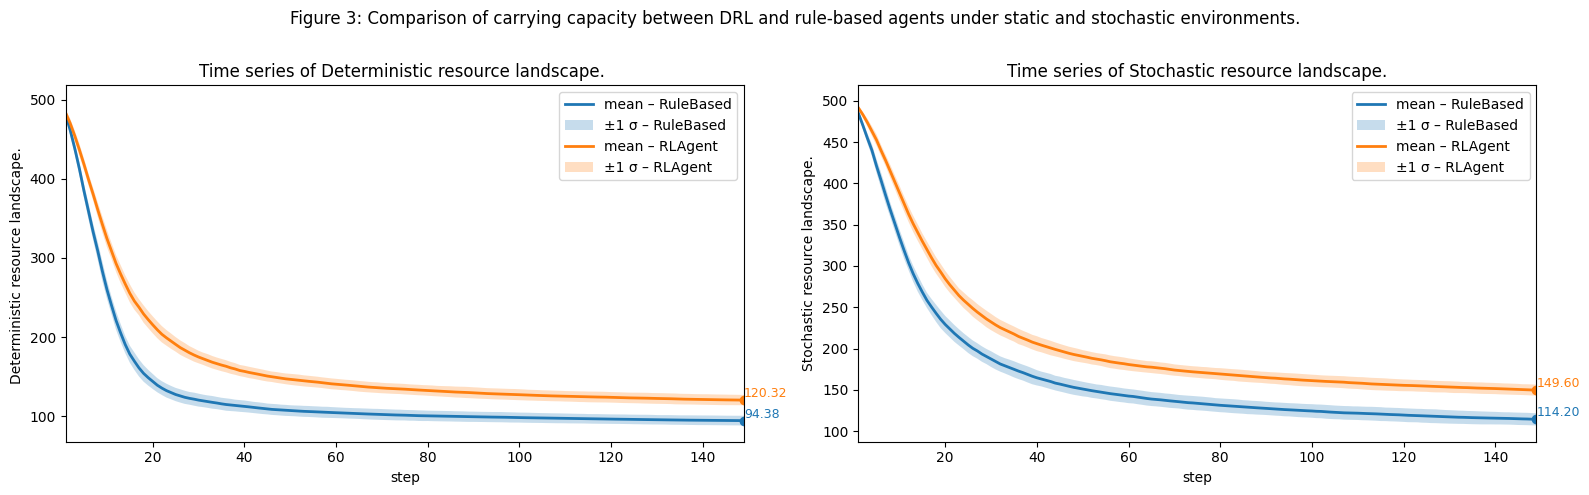

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
axs = axs.ravel()  # flatten for easy looping

compare_mean_overtime(list_alive_agents_config1, list_alive_agents_config2, 'RuleBased', 'RLAgent',
                      'Deterministic resource landscape. ', 1, is_show_overall=False, annotate_last_value=True, ax=axs[0])
compare_mean_overtime(list_alive_agents_config3, list_alive_agents_config4, 'RuleBased', 'RLAgent',
                      'Stochastic resource landscape.', 1, is_show_overall=False, annotate_last_value=True, ax=axs[1])

fig.suptitle("Figure 3: Comparison of carrying capacity between DRL and rule-based agents under static and stochastic environments.")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [8]:
list_last_alive_config1 = [s[149] for s in list_alive_agents_config1]
list_last_alive_config2 = [s[149] for s in list_alive_agents_config2]
t_test(list_last_alive_config2,list_last_alive_config1)

Paired t-test (n = 50): mean Δ = 25.94 95% CI [24.40, 27.48], t(49) = 33.90, p = 1.125e-35, Cohen's d = 4.79


In [9]:

list_last_alive_config3 = [s[149] for s in list_alive_agents_config3]
list_last_alive_config4 = [s[149] for s in list_alive_agents_config4]
t_test(list_last_alive_config4,list_last_alive_config3)

Paired t-test (n = 50): mean Δ = 35.40 95% CI [33.55, 37.25], t(49) = 38.51, p = 2.697e-38, Cohen's d = 5.45


### 2.2. Emergent Market Prices and Equilibrium

The next analysis focuses on Hypothesis H2, exploring how DRL-driven agents influence market equilibrium—specifically, whether adaptive learning accelerates price convergence and dampens volatility relative to heuristic traders. A defining feature of Sugarscape economies is the endogenous formation of market prices from decentralized trades.

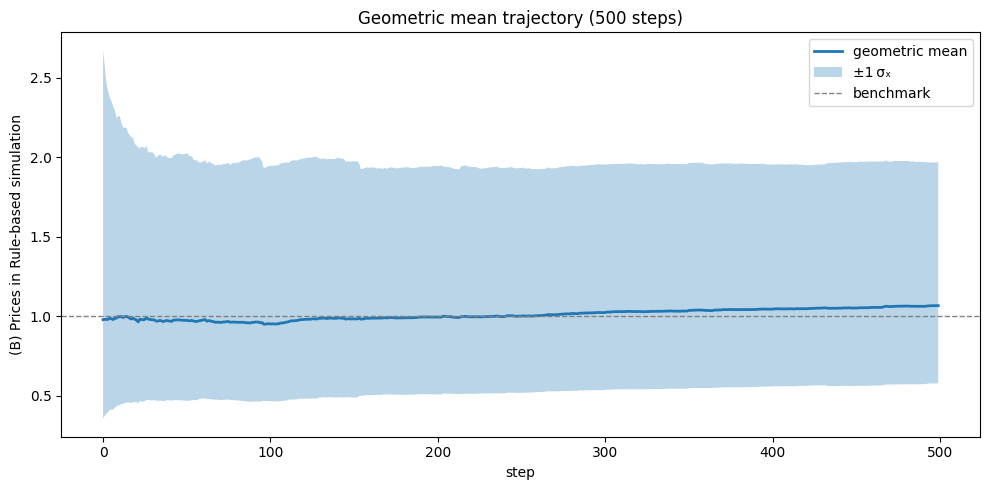

In [9]:
list_price_rb = [[a.currentPrice for a in step] for step in list_step_agents_test_stdev_1[0]]
show_geom_mean_overtime(list_price_rb,'(B) Prices in Rule-based simulation',1)

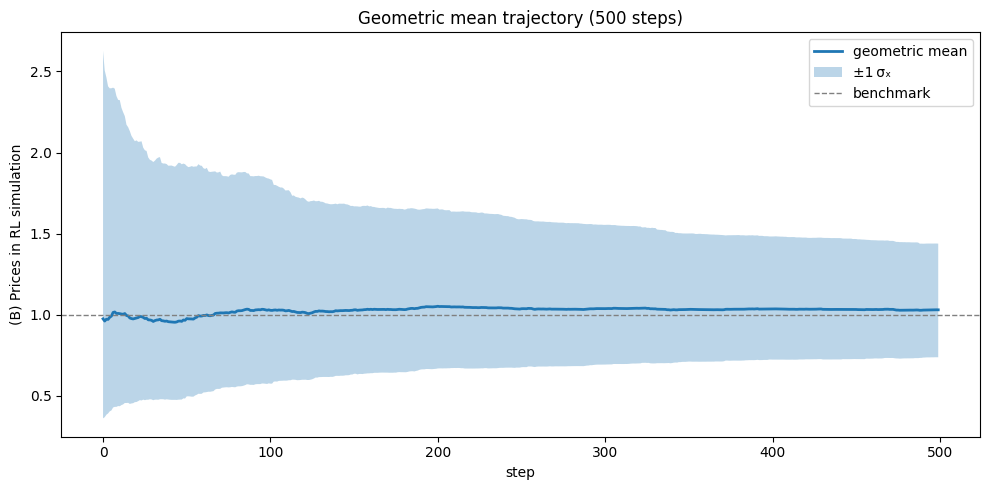

In [47]:
list_price_rl = [[a.currentPrice for a in step] for step in list_step_agents_test_stdev_2[0]]
show_geom_mean_overtime(list_price_rl,'(B) Prices in RL simulation',1)

### 2.3. Trade Frequency and Volume

Further evidence pertaining to Hypothesis H2 is provided by investigating trading activity itself, evaluating how learned strategies alter the tempo and volume of exchanges within DRL economies.

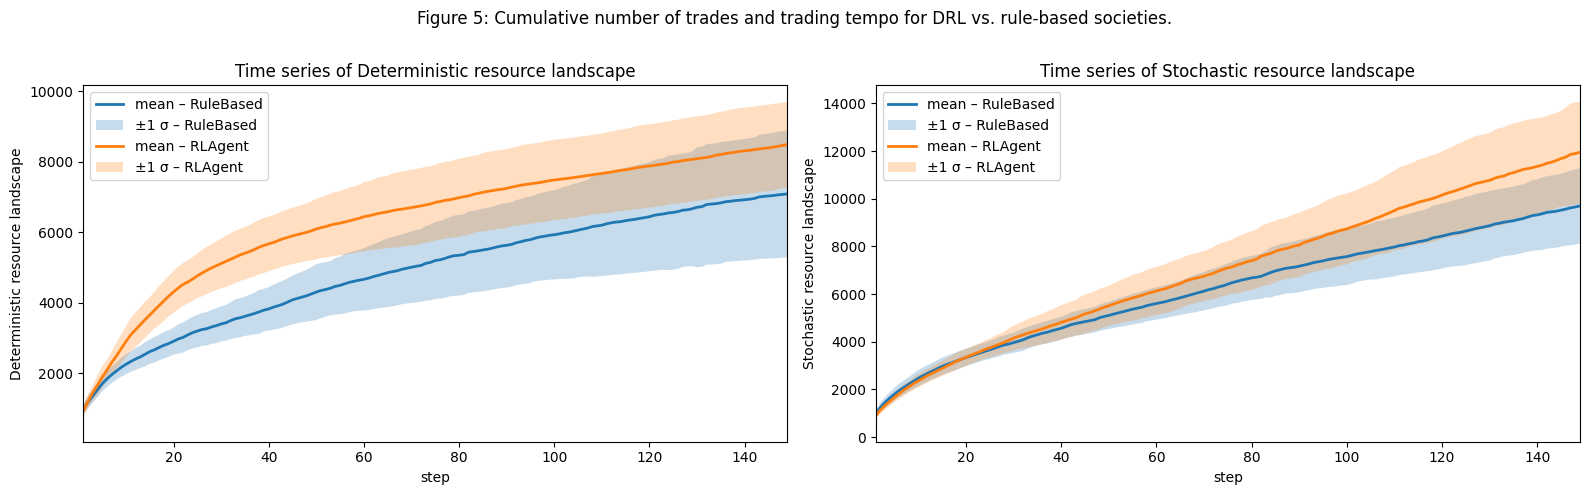

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
axs = axs.ravel()  # flatten for easy looping

compare_mean_overtime(list_trade_counts_config1, list_trade_counts_config2, 'RuleBased', 'RLAgent', 'Deterministic resource landscape', 1,
                      is_show_overall=False, ax=axs[0])
compare_mean_overtime(list_trade_counts_config3, list_trade_counts_config4, 'RuleBased', 'RLAgent', 'Stochastic resource landscape', 1,
                      is_show_overall=False, ax=axs[1])

fig.suptitle("Figure 5: Cumulative number of trades and trading tempo for DRL vs. rule-based societies.")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 2.4. Efficiency and Resource Utilization

In testing Hypothesis H3, the study compares the efficiency of resource exploitation and aggregate welfare generation between DRL and rule-based populations, determining whether adaptive agents achieve superior environmental utilization. Economic efficiency is assessed through total resource consumption, average wealth, and aggregate social wealth.

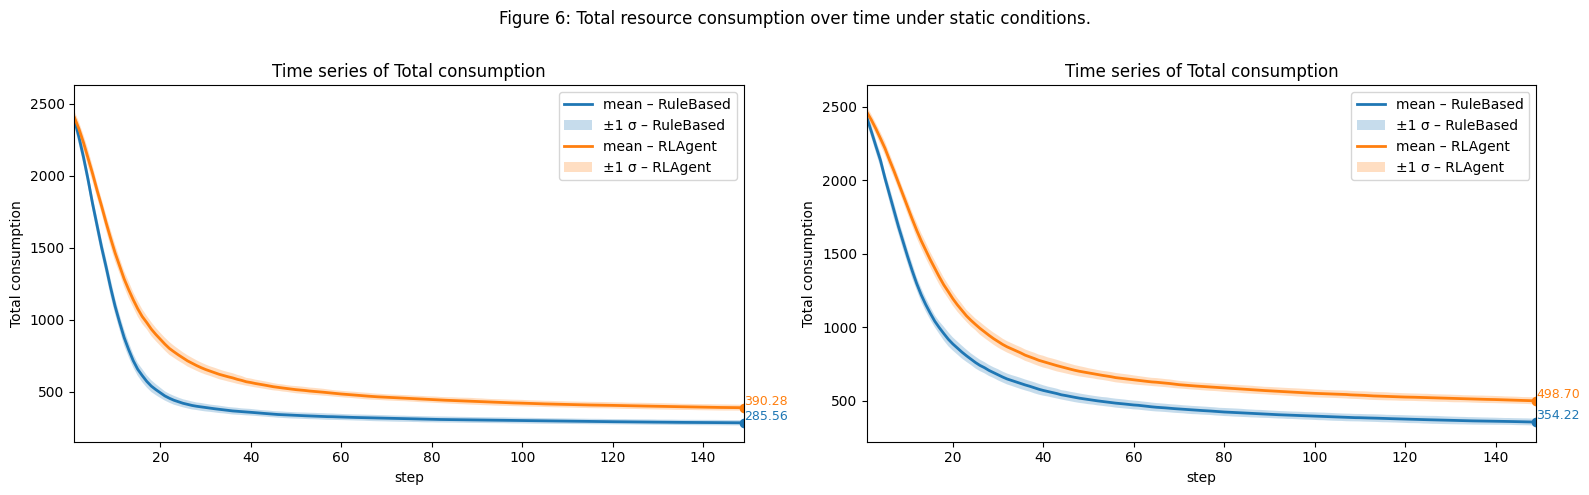

In [12]:
sugar_consumption_config1 = [[sum([a.SugarMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config1]
sugar_consumption_config2 = [[sum([a.SugarMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config2]
spice_consumption_config1 = [[sum([a.SpiceMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config1]
spice_consumption_config2 = [[sum([a.SpiceMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config2]

sugar_consumption_config3 = [[sum([a.SugarMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config3]
sugar_consumption_config4 = [[sum([a.SugarMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config4]
spice_consumption_config3 = [[sum([a.SpiceMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config3]
spice_consumption_config4 = [[sum([a.SpiceMetabolism for a in step]) for step in sim] for sim in
                             list_step_agents_config4]

sugar_consumption_config1 = np.array(sugar_consumption_config1)
spice_consumption_config1 = np.array(spice_consumption_config1)
total_consumption_config1 = sugar_consumption_config1 + spice_consumption_config1

sugar_consumption_config2 = np.array(sugar_consumption_config2)
spice_consumption_config2 = np.array(spice_consumption_config2)
total_consumption_config2 = sugar_consumption_config2 + spice_consumption_config2

sugar_consumption_config3 = np.array(sugar_consumption_config3)
spice_consumption_config3 = np.array(spice_consumption_config3)
total_consumption_config3 = sugar_consumption_config3 + spice_consumption_config3

sugar_consumption_config4 = np.array(sugar_consumption_config4)
spice_consumption_config4 = np.array(spice_consumption_config4)
total_consumption_config4 = sugar_consumption_config4 + spice_consumption_config4

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
axs = axs.ravel()  # flatten for easy looping

compare_mean_overtime(total_consumption_config1, total_consumption_config2, 'RuleBased', 'RLAgent', 'Total consumption',
                      1, is_show_overall=False, annotate_last_value=True, ax=axs[0])
compare_mean_overtime(total_consumption_config3, total_consumption_config4, 'RuleBased', 'RLAgent', 'Total consumption',
                      1, is_show_overall=False, annotate_last_value=True, ax=axs[1])

fig.suptitle("Figure 6: Total resource consumption over time under static conditions.")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

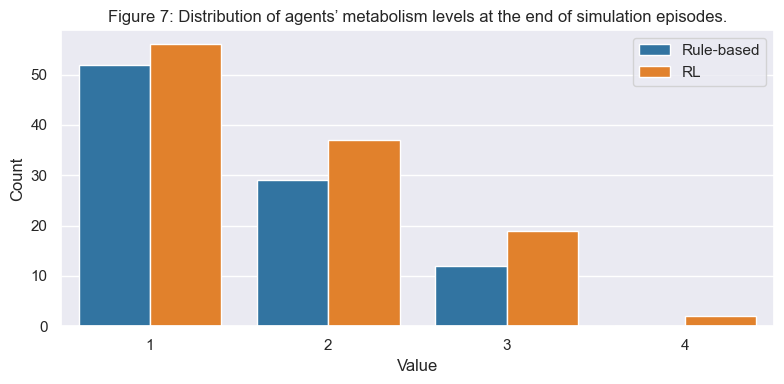

Total sugar metabolism: 146 vs 195


In [13]:
index = 0
sugar_metabolism_config1 = [a.SugarMetabolism for a in list_step_agents_config1[index][149]]
sugar_metabolism_config2 = [a.SugarMetabolism for a in list_step_agents_config2[index][149]]
plot_comparison_bars(sugar_metabolism_config1, sugar_metabolism_config2,
                     sub_title='Figure 7: Distribution of agents’ metabolism levels at the end of simulation episodes.')
print(f'Total sugar metabolism: {sum(sugar_metabolism_config1)} vs {sum(sugar_metabolism_config2)}')

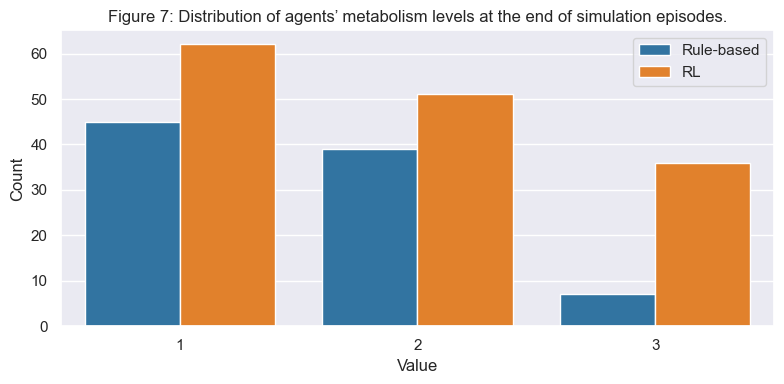

Total sugar metabolism: 144 vs 272


In [14]:
index = 0
sugar_metabolism_config3 = [a.SugarMetabolism for a in list_step_agents_config3[index][149]]
sugar_metabolism_config4 = [a.SugarMetabolism for a in list_step_agents_config4[index][149]]
plot_comparison_bars(sugar_metabolism_config3, sugar_metabolism_config4,
                     sub_title='Figure 7: Distribution of agents’ metabolism levels at the end of simulation episodes.')
print(f'Total sugar metabolism: {sum(sugar_metabolism_config3)} vs {sum(sugar_metabolism_config4)}')

### 2.5. Inequality and Wealth Distribution

Hypothesis H4 is examined through the lens of wealth distribution, assessing whether DRL economies, despite early inequality spikes, evolve toward fairer long-run equilibria with lower Gini and Pareto-tail concentration. Wealth inequality is analyzed through Gini coefficients and Pareto tail exponents.

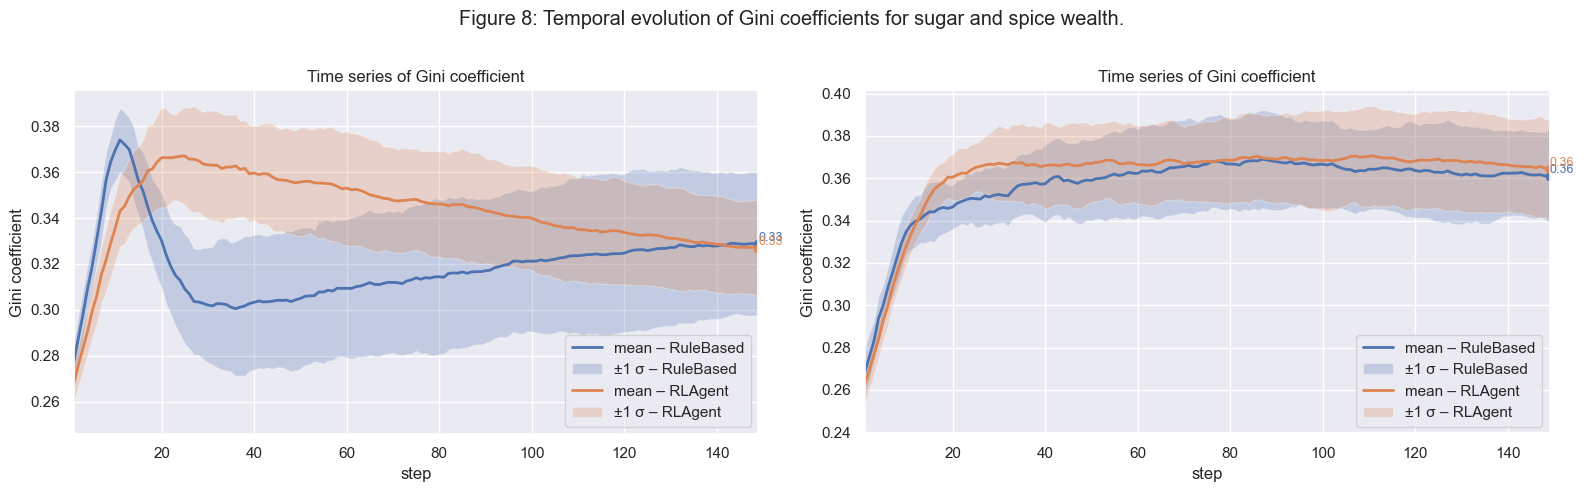

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
axs = axs.ravel()  # flatten for easy looping

compare_mean_overtime(list_inequality_config1, list_inequality_config2, 'RuleBased', 'RLAgent',
                      'Gini coefficient', 1, is_show_overall=False, annotate_last_value=True, ax=axs[0])
compare_mean_overtime(list_inequality_config3, list_inequality_config4, 'RuleBased', 'RLAgent', 'Gini coefficient', 1,
                      is_show_overall=False,annotate_last_value=True, ax=axs[1])

fig.suptitle("Figure 8: Temporal evolution of Gini coefficients for sugar and spice wealth.")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

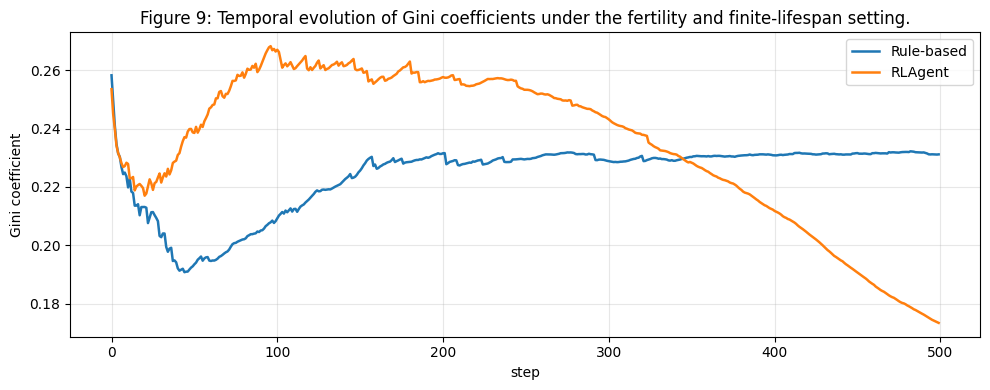

In [29]:
# nA, nB = len(list_inequality_test_stdev_1[0]), len(list_inequality_test_stdev_2[0])
# steps_A = range(nA)  # 0 … nA-1
# steps_B = range(nB)
#
# fig, ax = plt.subplots(figsize=(10, 4))
# ax.plot(steps_A, list_inequality_test_stdev_1[0], label="Rule-based", linewidth=1.8)
# ax.plot(steps_B, list_inequality_test_stdev_2[0], label="RLAgent", linewidth=1.8)
#
# ax.set_xlabel("step")
# ax.set_ylabel("Gini coefficient")
# ax.set_title("Figure 8: Temporal evolution of Gini coefficients under the fertility and finite-lifespan setting.")
# ax.grid(True, alpha=0.3)
# ax.legend(loc="upper right")
#
# plt.tight_layout()
# plt.show()

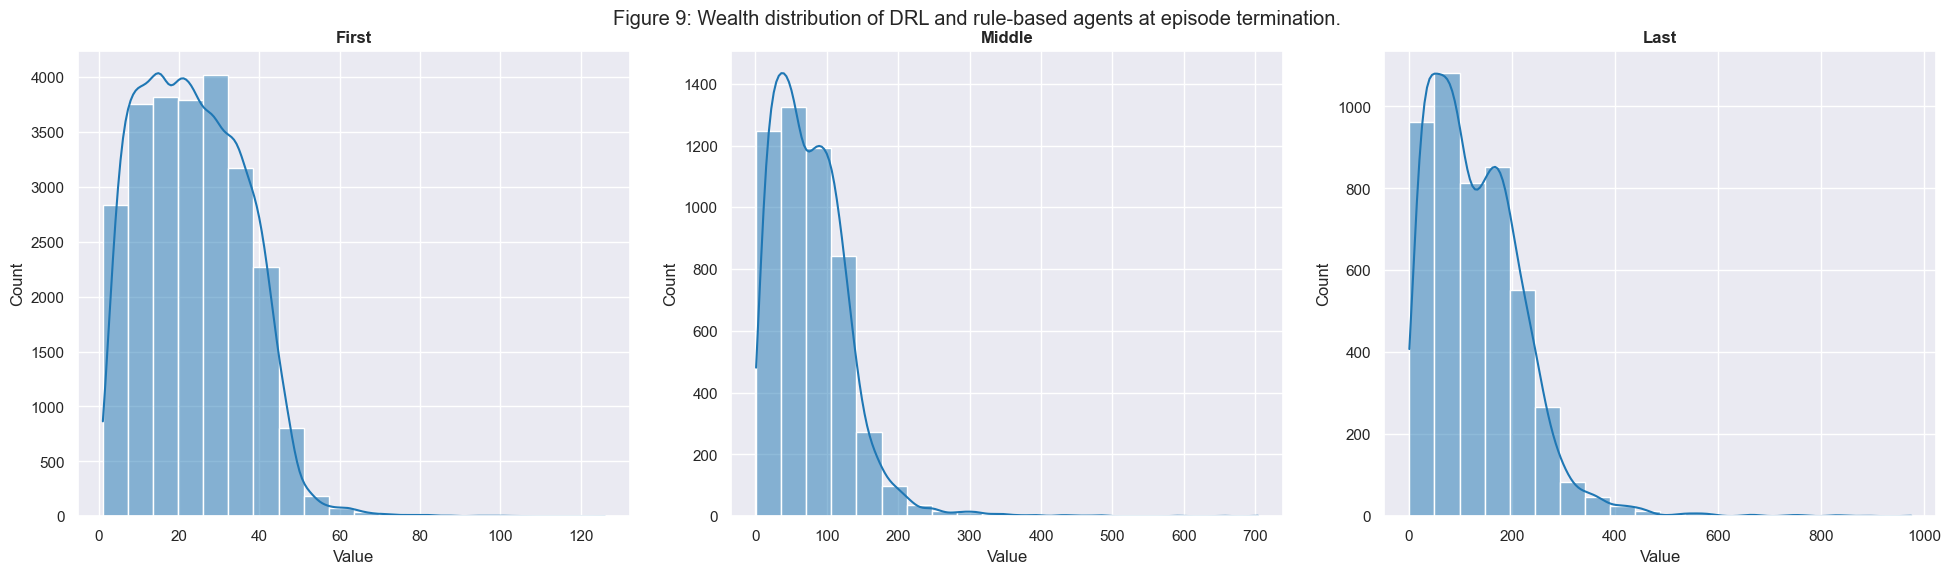

In [16]:
first = [[agent.remainSugar for agent in simulation[0]] for simulation in list_step_agents_config1]
first = [item for sub in first for item in sub]
middle = [[agent.remainSugar for agent in simulation[75]] for simulation in list_step_agents_config1]
middle = [item for sub in middle for item in sub]
last = [[agent.remainSugar for agent in simulation[149]] for simulation in list_step_agents_config1]
last = [item for sub in last for item in sub]
plot_progress_three(first, middle, last, sub_title="Figure 9: Wealth distribution of DRL and rule-based agents at episode termination.")

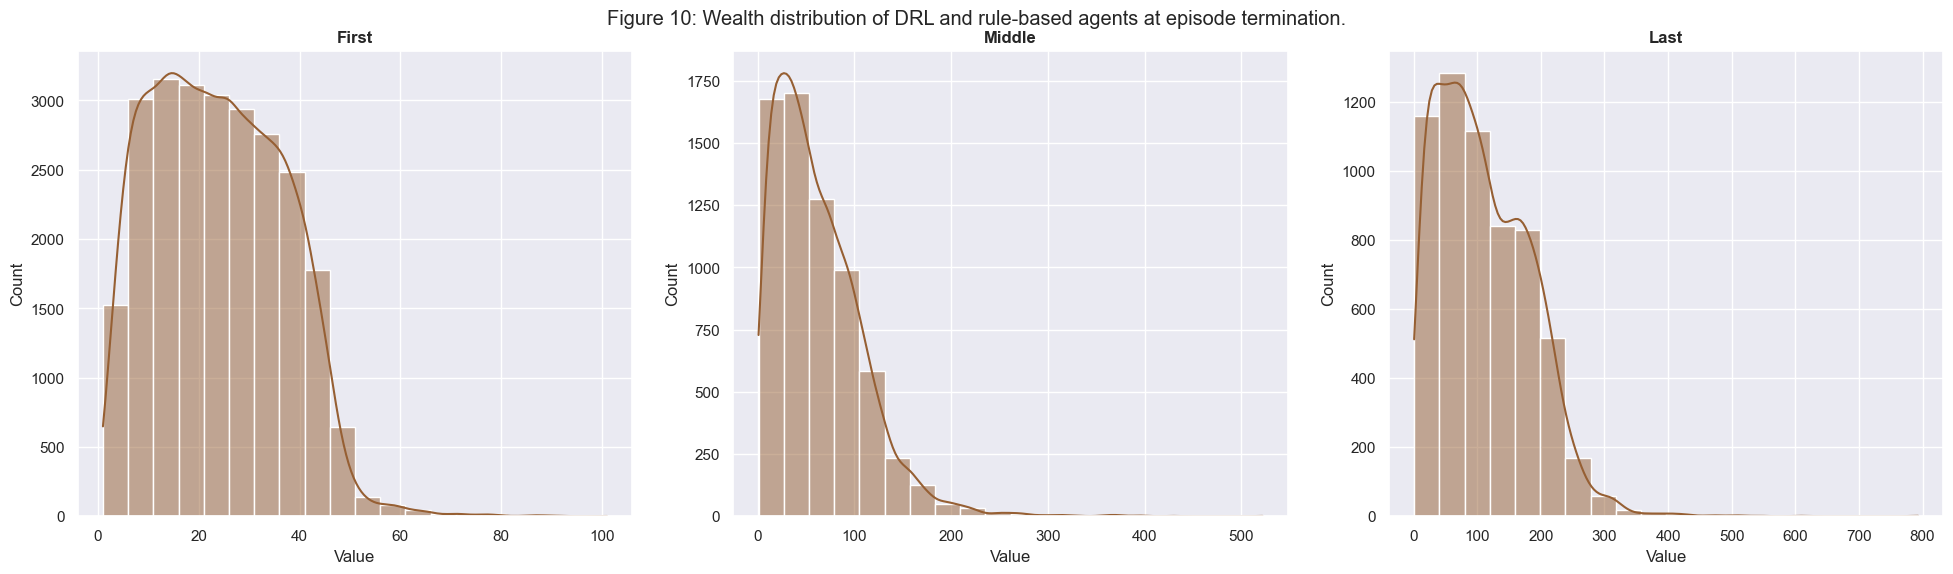

In [17]:
first = [[agent.remainSugar for agent in simulation[0]] for simulation in list_step_agents_config2]
first = [item for sub in first for item in sub]
middle = [[agent.remainSugar for agent in simulation[75]] for simulation in list_step_agents_config2]
middle = [item for sub in middle for item in sub]
last = [[agent.remainSugar for agent in simulation[149]] for simulation in list_step_agents_config2]
last = [item for sub in last for item in sub]
plot_progress_three(first, middle, last, color='#965F33',sub_title="Figure 10: Wealth distribution of DRL and rule-based agents at episode termination.")

### 2.6. Dynamic Spatial and Sustainability Patterns

Finally, to synthesize the preceding hypotheses (H1–H3), this subsection analyzes the spatial and temporal patterns of resource use, demonstrating how adaptive learning fosters sustainable equilibrium across the landscape.

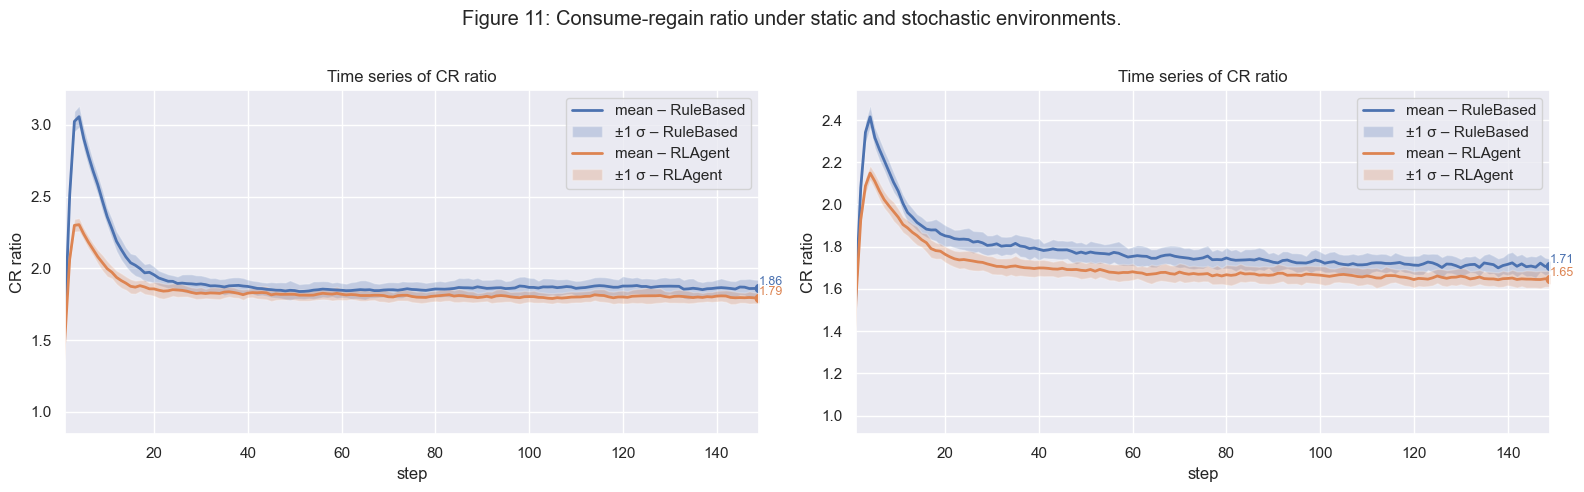

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=True)
axs = axs.ravel()  # flatten for easy looping

compare_mean_overtime(list_cr_ratios_config1, list_cr_ratios_config2, 'RuleBased', 'RLAgent',
                      'CR ratio', 1, is_show_overall=False, annotate_last_value=True, ax=axs[0])
compare_mean_overtime(list_cr_ratios_config3, list_cr_ratios_config4, 'RuleBased', 'RLAgent', 'CR ratio',
                      1, is_show_overall=False, annotate_last_value=True, ax=axs[1])

fig.suptitle("Figure 11: Consume-regain ratio under static and stochastic environments.")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()